In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding
from keras import backend as K
import keras

np.random.seed(10)

In [2]:
from keras.datasets import mnist

In [3]:
(X_train_image, y_train_label), (X_test_image, y_test_label) = mnist.load_data()

print("\t[Info] train data={:7,}".format(len(X_train_image)))  
print("\t[Info] test  data={:7,}".format(len(X_test_image))) 

	[Info] train data= 60,000
	[Info] test  data= 10,000


In [4]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary') # cmap='binary' 參數設定以黑白灰階顯示
    plt.show()

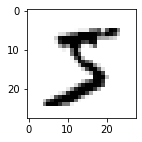

In [5]:
plot_image(X_train_image[0])

In [6]:
y_train_label[0]

5

In [7]:
def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)  
    if num > 25: num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
        title = "l=" + str(labels[idx])  
        if len(prediction) > 0:  
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "l={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
    plt.show()

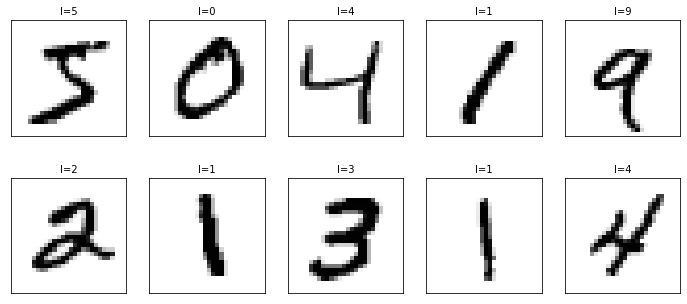

In [8]:
plot_images_labels_predict(X_train_image, y_train_label, [], 0, 10)

In [9]:
x_Train = X_train_image.reshape(60000, 28*28).astype('float32')
x_Test = X_test_image.reshape(10000, 28*28).astype('float32')
print("\t[Info] xTrain: %s" % (str(x_Train.shape)))
print("\t[Info] xTest: %s" % (str(x_Test.shape)))
  
# Normalization
x_Train_norm = x_Train/255
x_Test_norm = x_Test/255

	[Info] xTrain: (60000, 784)
	[Info] xTest: (10000, 784)


In [10]:
y_TrainOneHot = np_utils.to_categorical(y_train_label) # 將 training 的 label 進行 one-hot encoding
y_TestOneHot = np_utils.to_categorical(y_test_label) # 將測試的 labels 進行 one-hot encoding

y_train_label[0] # 檢視 training labels 第一個 label 的值
y_TrainOneHot[:1] # 檢視第一個 label 在 one-hot encoding 後的結果, 會在第六個位置上為 1, 其他位置上為 0

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [11]:
from keras.models import Sequential  
from keras.layers import Dense  
  
model = Sequential()  # Build Linear Model  
  
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu')) # Add Input/hidden layer  
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax')) # Add Hidden/output layer  
print("\t[Info] Model summary:")  
model.summary()  
print("")

	[Info] Model summary:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________



In [12]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [13]:
train_history = model.fit(x=x_Train_norm, 
                          y=y_TrainOneHot, 
                          validation_split=0.2, 
                          epochs=10, 
                          batch_size=200, 
                          verbose=2)

Epoch 1/10
240/240 - 3s - loss: 0.4350 - accuracy: 0.8848 - val_loss: 0.2153 - val_accuracy: 0.9391
Epoch 2/10
240/240 - 1s - loss: 0.1862 - accuracy: 0.9461 - val_loss: 0.1548 - val_accuracy: 0.9577
Epoch 3/10
240/240 - 1s - loss: 0.1340 - accuracy: 0.9613 - val_loss: 0.1326 - val_accuracy: 0.9624
Epoch 4/10
240/240 - 1s - loss: 0.1012 - accuracy: 0.9715 - val_loss: 0.1100 - val_accuracy: 0.9677
Epoch 5/10
240/240 - 1s - loss: 0.0800 - accuracy: 0.9780 - val_loss: 0.1004 - val_accuracy: 0.9691
Epoch 6/10
240/240 - 1s - loss: 0.0654 - accuracy: 0.9819 - val_loss: 0.0918 - val_accuracy: 0.9709
Epoch 7/10
240/240 - 1s - loss: 0.0540 - accuracy: 0.9847 - val_loss: 0.0866 - val_accuracy: 0.9726
Epoch 8/10
240/240 - 1s - loss: 0.0449 - accuracy: 0.9878 - val_loss: 0.0827 - val_accuracy: 0.9742
Epoch 9/10
240/240 - 1s - loss: 0.0371 - accuracy: 0.9906 - val_loss: 0.0819 - val_accuracy: 0.9748
Epoch 10/10
240/240 - 1s - loss: 0.0315 - accuracy: 0.9920 - val_loss: 0.0806 - val_accuracy: 0.9761

In [14]:
import matplotlib.pyplot as plt  
def show_train_history(train_history, name, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title(name)  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()

In [15]:
print(train_history.history)

{'loss': [0.435004323720932, 0.18622075021266937, 0.13403618335723877, 0.10122469067573547, 0.07999233901500702, 0.06544912606477737, 0.05404099449515343, 0.0449288934469223, 0.03708163648843765, 0.0314849354326725], 'accuracy': [0.8848124742507935, 0.9461458325386047, 0.9613333344459534, 0.9714583158493042, 0.9779583215713501, 0.9818750023841858, 0.9847291707992554, 0.9877708554267883, 0.9906458258628845, 0.99197918176651], 'val_loss': [0.21530954539775848, 0.15483111143112183, 0.1326475888490677, 0.10998669266700745, 0.10042770206928253, 0.09183011949062347, 0.08660509437322617, 0.08273966610431671, 0.08187037706375122, 0.08055492490530014], 'val_accuracy': [0.9390833377838135, 0.9576666951179504, 0.9624166488647461, 0.9676666855812073, 0.969083309173584, 0.9709166884422302, 0.9725833535194397, 0.9741666913032532, 0.9748333096504211, 0.9760833382606506]}


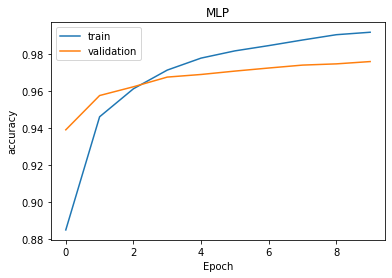

In [16]:
show_train_history(train_history, 'MLP', 'accuracy', 'val_accuracy')

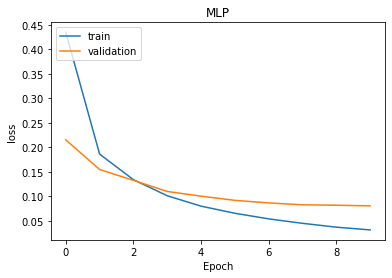

In [17]:
show_train_history(train_history, 'MLP', 'loss', 'val_loss')

In [18]:
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print(scores)  
#print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

313/313 [==============================] - 1s 3ms/step - loss: 0.0750 - accuracy: 0.9782
[0.07504717260599136, 0.9782000184059143]


	[Info] Making prediction to x_Test_norm

	[Info] Show 10 prediction result (From 240):
[5 9 8 7 2 3 0 2 4 2]



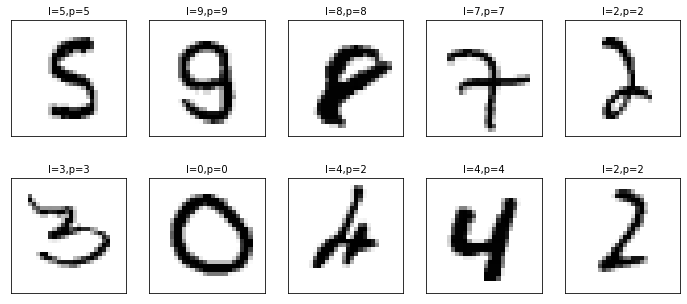

In [41]:
print("\t[Info] Making prediction to x_Test_norm")  
prediction = model.predict_classes(x_Test_norm)  # Making prediction and save result to prediction  
print()  
print("\t[Info] Show 10 prediction result (From 240):")  
print("%s\n" % (prediction[240:250]))  
  
plot_images_labels_predict(X_test_image, y_test_label, prediction, idx=240)

In [48]:
pd.crosstab(y_test_label, prediction, rownames=['實際值'], colnames=['預測值'])

預測值,0,1,2,3,4,5,6,7,8,9
實際值,,,,,,,,,,
0,970,0,1,0,1,1,3,1,3,0
1,0,1123,4,1,0,1,2,1,3,0
2,4,1,1004,3,2,0,2,5,11,0
3,2,0,4,986,0,6,0,2,6,4
4,1,0,4,1,950,1,3,4,2,16
5,2,0,0,7,0,873,4,1,4,1
6,6,2,2,1,4,7,932,0,4,0
7,1,4,9,3,0,0,0,1003,2,6
8,5,0,2,5,3,2,1,3,950,3


# LSTM

In [ ]:
K.clear_session()

In [ ]:
learning_rate = 0.001
training_iters = 20
batch_size = 128
display_step = 10
n_classes = 10

In [42]:
x_train_LSTM = X_train_image.reshape(-1, 28, 28).astype('float32')
x_test_LSTM = X_test_image.reshape(-1, 28, 28).astype('float32')

print("\t[Info] xTrain: %s" % (str(x_train_LSTM.shape)))
print("\t[Info] xTest: %s" % (str(x_test_LSTM.shape)))

x_train_LSTM_norm = x_train_LSTM/255
x_test_LSTM_norm = x_test_LSTM/255

	[Info] xTrain: (60000, 28, 28)
	[Info] xTest: (10000, 28, 28)


In [43]:
y_train_LSTM = keras.utils.to_categorical(y_train_label)
y_test_LSTM = keras.utils.to_categorical(y_test_label)

In [23]:
from keras.models import Sequential  
from keras.layers import LSTM  
from keras.layers import Dense
  
model1 = Sequential()  # Build Linear Model  
  
model1.add(LSTM(units=128, batch_input_shape=(None, 28, 28), kernel_initializer='normal', activation='relu')) # Add Input/hidden layer 
model1.add(Dense(units=10, kernel_initializer='normal', activation='softmax')) # Add Hidden/output layer  
print("\t[Info] Model summary:")  
model1.summary()  
print("")

	[Info] Model summary:
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               80384     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________



In [24]:
opt = keras.optimizers.Adam(learning_rate=0.003)
model1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [25]:
train_history1 = model1.fit(x=x_train_LSTM_norm, 
                          y=y_train_LSTM, 
                          validation_split=0.2, 
                          epochs=10, 
                          batch_size=200, 
                          validation_data=(x_test_LSTM_norm, y_test_LSTM),
                          verbose=2)

Epoch 1/10
240/240 - 18s - loss: 0.9599 - accuracy: 0.6816 - val_loss: 0.2553 - val_accuracy: 0.9197
Epoch 2/10
240/240 - 19s - loss: 0.1843 - accuracy: 0.9434 - val_loss: 0.1477 - val_accuracy: 0.9548
Epoch 3/10
240/240 - 18s - loss: 0.1120 - accuracy: 0.9655 - val_loss: 0.0856 - val_accuracy: 0.9743
Epoch 4/10
240/240 - 18s - loss: 0.0825 - accuracy: 0.9745 - val_loss: 0.0964 - val_accuracy: 0.9718
Epoch 5/10
240/240 - 18s - loss: 0.0724 - accuracy: 0.9778 - val_loss: 0.0700 - val_accuracy: 0.9804
Epoch 6/10
240/240 - 18s - loss: 0.0599 - accuracy: 0.9820 - val_loss: 0.0657 - val_accuracy: 0.9809
Epoch 7/10
240/240 - 18s - loss: 0.0491 - accuracy: 0.9850 - val_loss: 0.0590 - val_accuracy: 0.9820
Epoch 8/10
240/240 - 18s - loss: 0.0424 - accuracy: 0.9868 - val_loss: 0.0729 - val_accuracy: 0.9808
Epoch 9/10
240/240 - 18s - loss: 0.0398 - accuracy: 0.9869 - val_loss: 0.0646 - val_accuracy: 0.9819
Epoch 10/10
240/240 - 18s - loss: 0.0360 - accuracy: 0.9889 - val_loss: 0.0656 - val_accura

In [26]:
print(train_history1.history)

{'loss': [0.9599329233169556, 0.18433304131031036, 0.11198633164167404, 0.08254893124103546, 0.07242732495069504, 0.05988408252596855, 0.049133457243442535, 0.042446915060281754, 0.03983748331665993, 0.035979874432086945], 'accuracy': [0.6815624833106995, 0.9434166550636292, 0.965541660785675, 0.9745000004768372, 0.9778125286102295, 0.9819791913032532, 0.9850208163261414, 0.9867916703224182, 0.9869166612625122, 0.988854169845581], 'val_loss': [0.25532183051109314, 0.14768190681934357, 0.08563394844532013, 0.09638325124979019, 0.06998728215694427, 0.0656665787100792, 0.059036143124103546, 0.07291366904973984, 0.06463813036680222, 0.06555206328630447], 'val_accuracy': [0.9196666479110718, 0.9548333287239075, 0.9743333458900452, 0.971750020980835, 0.9804166555404663, 0.9809166789054871, 0.9819999933242798, 0.9807500243186951, 0.9819166660308838, 0.9818333387374878]}


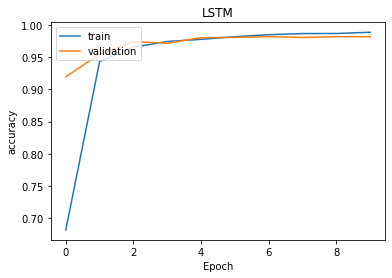

In [44]:
show_train_history(train_history1, 'LSTM', 'accuracy', 'val_accuracy')

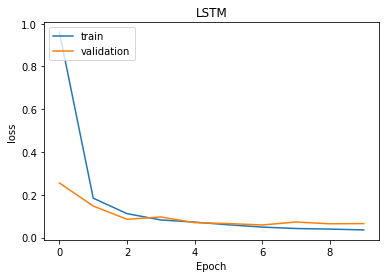

In [45]:
show_train_history(train_history1, 'LSTM', 'loss', 'val_loss')

In [70]:
scores1 = model1.evaluate(x_test_LSTM_norm, y_test_LSTM)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores1[1]*100.0))

313/313 [==============================] - 2s 5ms/step - loss: 0.0589 - accuracy: 0.9820

	[Info] Accuracy of testing data = 98.2%


	[Info] Making prediction to x_test_LSTM_norm

	[Info] Show 10 prediction result (From 240):
[5 9 8 7 2 3 0 2 4 2]



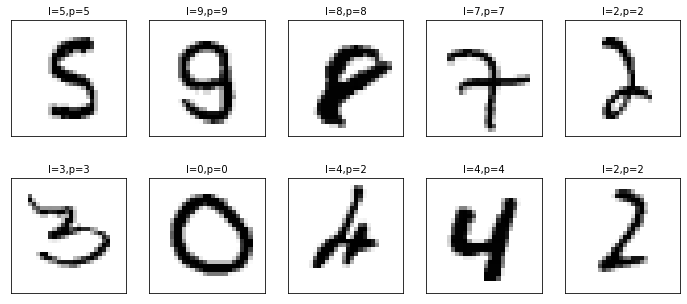

In [47]:
print("\t[Info] Making prediction to x_test_LSTM_norm")  
prediction1 = model1.predict_classes(x_test_LSTM_norm)  # Making prediction and save result to prediction  
print()  
print("\t[Info] Show 10 prediction result (From 240):")  
print("%s\n" % (prediction[240:250]))  
  
plot_images_labels_predict(X_test_image, y_test_label, prediction, idx=240)

In [49]:
pd.crosstab(y_test_label, prediction1, rownames=['實際值'], colnames=['預測值'])

預測值,0,1,2,3,4,5,6,7,8,9
實際值,,,,,,,,,,
0,976,0,0,0,0,0,2,1,1,0
1,0,1113,2,2,0,2,5,3,8,0
2,1,0,1012,5,0,0,2,5,5,2
3,0,0,1,995,0,11,0,1,0,2
4,2,1,0,1,948,0,7,2,4,17
5,0,0,0,2,0,881,5,2,2,0
6,5,1,0,0,0,1,951,0,0,0
7,0,2,7,8,1,0,0,1007,0,3
8,0,0,2,1,1,3,5,1,957,4


## GRU

In [ ]:
K.clear_session()

In [ ]:
learning_rate = 0.001
batch_size = 128
display_step = 10
n_classes = 10

In [50]:
x_train_GRU = X_train_image.reshape(-1, 28, 28).astype('float32')
x_test_GRU = X_test_image.reshape(-1, 28, 28).astype('float32')

print("\t[Info] xTrain: %s" % (str(x_train_GRU.shape)))
print("\t[Info] xTest: %s" % (str(x_test_GRU.shape)))

x_train_GRU_norm = x_train_GRU/255
x_test_GRU_norm = x_test_GRU/255

	[Info] xTrain: (60000, 28, 28)
	[Info] xTest: (10000, 28, 28)


In [32]:
y_train_GRU = keras.utils.to_categorical(y_train_label)
y_test_GRU = keras.utils.to_categorical(y_test_label)

In [33]:
from keras.models import Sequential  
from keras.layers import GRU  
from keras.layers import Dense
  
model2 = Sequential()  # Build Linear Model  
  
model2.add(GRU(units=128, batch_input_shape=(None, 28, 28), kernel_initializer='normal', activation='relu')) # Add Input/hidden layer 
model2.add(Dense(units=10, kernel_initializer='normal', activation='softmax')) # Add Hidden/output layer  
print("\t[Info] Model summary:")  
model2.summary()  
print("")

	[Info] Model summary:
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 128)               60672     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 61,962
Trainable params: 61,962
Non-trainable params: 0
_________________________________________________________________



In [34]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [35]:
train_history2 = model2.fit(x=x_train_GRU_norm, 
                          y=y_train_GRU, 
                          validation_split=0.2, 
                          epochs=10, 
                          batch_size=200, 
                          validation_data=(x_test_GRU_norm, y_test_GRU),
                          verbose=2)

Epoch 1/10
240/240 - 14s - loss: 1.0814 - accuracy: 0.6184 - val_loss: 0.4116 - val_accuracy: 0.8704
Epoch 2/10
240/240 - 15s - loss: 0.3064 - accuracy: 0.9046 - val_loss: 0.2051 - val_accuracy: 0.9371
Epoch 3/10
240/240 - 14s - loss: 0.1795 - accuracy: 0.9436 - val_loss: 0.1535 - val_accuracy: 0.9543
Epoch 4/10
240/240 - 19s - loss: 0.1308 - accuracy: 0.9594 - val_loss: 0.1078 - val_accuracy: 0.9658
Epoch 5/10
240/240 - 15s - loss: 0.1043 - accuracy: 0.9677 - val_loss: 0.1024 - val_accuracy: 0.9690
Epoch 6/10
240/240 - 17s - loss: 0.0883 - accuracy: 0.9724 - val_loss: 0.0867 - val_accuracy: 0.9735
Epoch 7/10
240/240 - 15s - loss: 0.0734 - accuracy: 0.9770 - val_loss: 0.0702 - val_accuracy: 0.9772
Epoch 8/10
240/240 - 17s - loss: 0.0663 - accuracy: 0.9795 - val_loss: 0.0672 - val_accuracy: 0.9804
Epoch 9/10
240/240 - 16s - loss: 0.0636 - accuracy: 0.9797 - val_loss: 0.0719 - val_accuracy: 0.9778
Epoch 10/10
240/240 - 17s - loss: 0.0548 - accuracy: 0.9825 - val_loss: 0.0651 - val_accura

In [51]:
print(train_history2.history)

{'loss': [1.08139967918396, 0.3064314126968384, 0.17954187095165253, 0.13076788187026978, 0.10430093109607697, 0.08827059715986252, 0.0733584612607956, 0.06632919609546661, 0.06361203640699387, 0.05480126291513443], 'accuracy': [0.6183958053588867, 0.9046041369438171, 0.9435625076293945, 0.9593750238418579, 0.9677083492279053, 0.9724166393280029, 0.9769791960716248, 0.979520857334137, 0.9796666502952576, 0.9825000166893005], 'val_loss': [0.41159260272979736, 0.2050645351409912, 0.1534767746925354, 0.10775401443243027, 0.10244031995534897, 0.08665978908538818, 0.07024398446083069, 0.0671791359782219, 0.07188591361045837, 0.06513454020023346], 'val_accuracy': [0.8704166412353516, 0.9370833039283752, 0.9543333053588867, 0.965833306312561, 0.968999981880188, 0.9735000133514404, 0.9772499799728394, 0.9804166555404663, 0.9778333306312561, 0.9801666736602783]}


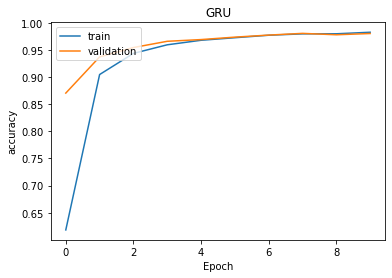

In [53]:
show_train_history(train_history2, 'GRU', 'accuracy', 'val_accuracy')

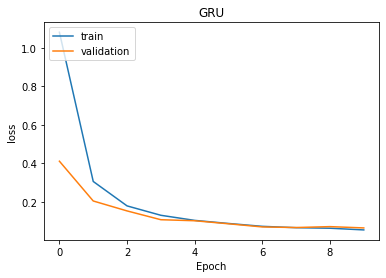

In [54]:
show_train_history(train_history2, 'GRU', 'loss', 'val_loss')

In [69]:
scores2 = model2.evaluate(x_test_GRU_norm, y_test_GRU)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores2[1]*100.0))

313/313 [==============================] - 1s 4ms/step - loss: 0.0686 - accuracy: 0.9785

	[Info] Accuracy of testing data = 97.9%


	[Info] Making prediction to x_test_LSTM_norm


D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



	[Info] Show 10 prediction result (From 240):
[5 9 8 7 2 3 0 2 4 2]



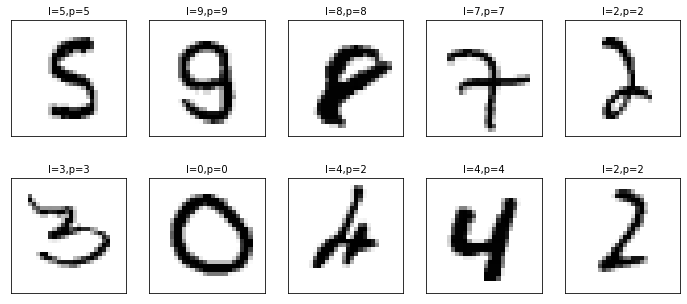

In [56]:
print("\t[Info] Making prediction to x_test_LSTM_norm")  
prediction2 = model2.predict_classes(x_test_GRU_norm)  # Making prediction and save result to prediction  
print()  
print("\t[Info] Show 10 prediction result (From 240):")  
print("%s\n" % (prediction[240:250]))  
  
plot_images_labels_predict(X_test_image, y_test_label, prediction, idx=240)

In [57]:
pd.crosstab(y_test_label, prediction2, rownames=['實際值'], colnames=['預測值'])

預測值,0,1,2,3,4,5,6,7,8,9
實際值,,,,,,,,,,
0,970,0,0,0,0,1,4,1,4,0
1,0,1132,1,0,0,0,2,0,0,0
2,1,0,1019,5,1,0,0,2,4,0
3,0,0,6,986,0,12,0,2,1,3
4,0,0,1,0,949,0,7,2,5,18
5,3,0,0,7,0,876,2,1,2,1
6,4,4,0,0,0,4,946,0,0,0
7,1,12,12,3,0,0,0,995,0,5
8,1,2,2,11,0,5,5,4,942,2


## RNN

In [ ]:
K.clear_session()

In [ ]:
learning_rate = 0.001
batch_size = 128
display_step = 10
n_classes = 10

In [58]:
x_train_RNN = X_train_image.reshape(-1, 28, 28).astype('float32')
x_test_RNN = X_test_image.reshape(-1, 28, 28).astype('float32')

print("\t[Info] xTrain: %s" % (str(x_train_RNN.shape)))
print("\t[Info] xTest: %s" % (str(x_test_RNN.shape)))

x_train_RNN_norm = x_train_RNN/255
x_test_RNN_norm = x_test_RNN/255

	[Info] xTrain: (60000, 28, 28)
	[Info] xTest: (10000, 28, 28)


In [59]:
y_train_RNN = keras.utils.to_categorical(y_train_label)
y_test_RNN = keras.utils.to_categorical(y_test_label)

In [60]:
from keras.models import Sequential  
from keras.layers import SimpleRNN  
from keras.layers import Dense
  
model3 = Sequential()  # Build Linear Model  
  
model3.add(SimpleRNN(units=128, batch_input_shape=(None, 28, 28), kernel_initializer='normal', activation='relu')) # Add Input/hidden layer 
model3.add(Dense(units=10, kernel_initializer='normal', activation='softmax')) # Add Hidden/output layer  
print("\t[Info] Model summary:")  
model3.summary()  
print("")

	[Info] Model summary:
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 128)               20096     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 21,386
Trainable params: 21,386
Non-trainable params: 0
_________________________________________________________________



In [61]:
opt = keras.optimizers.Adam(learning_rate=0.003)
model3.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [62]:
train_history3 = model3.fit(x=x_train_RNN_norm, 
                          y=y_train_RNN, 
                          validation_split=0.2, 
                          epochs=10, 
                          batch_size=200, 
                          validation_data=(x_test_RNN_norm, y_test_RNN),
                          verbose=2)

Epoch 1/10
240/240 - 4s - loss: 0.8483 - accuracy: 0.7062 - val_loss: 0.3190 - val_accuracy: 0.9097
Epoch 2/10
240/240 - 3s - loss: 0.2684 - accuracy: 0.9231 - val_loss: 0.2028 - val_accuracy: 0.9410
Epoch 3/10
240/240 - 4s - loss: 0.1978 - accuracy: 0.9430 - val_loss: 0.1616 - val_accuracy: 0.9544
Epoch 4/10
240/240 - 3s - loss: 0.1686 - accuracy: 0.9535 - val_loss: 0.1719 - val_accuracy: 0.9530
Epoch 5/10
240/240 - 3s - loss: 0.1541 - accuracy: 0.9569 - val_loss: 0.1515 - val_accuracy: 0.9571
Epoch 6/10
240/240 - 4s - loss: 0.1393 - accuracy: 0.9611 - val_loss: 0.1444 - val_accuracy: 0.9617
Epoch 7/10
240/240 - 4s - loss: 0.1241 - accuracy: 0.9647 - val_loss: 0.1437 - val_accuracy: 0.9602
Epoch 8/10
240/240 - 4s - loss: 0.1271 - accuracy: 0.9644 - val_loss: 0.1355 - val_accuracy: 0.9625
Epoch 9/10
240/240 - 4s - loss: 0.1255 - accuracy: 0.9659 - val_loss: 0.1357 - val_accuracy: 0.9626
Epoch 10/10
240/240 - 4s - loss: 0.1170 - accuracy: 0.9665 - val_loss: 0.1089 - val_accuracy: 0.9713

In [63]:
print(train_history3.history)

{'loss': [0.8482721447944641, 0.26843738555908203, 0.1977752298116684, 0.1685992181301117, 0.1540575921535492, 0.13934628665447235, 0.12413834780454636, 0.12711778283119202, 0.12545213103294373, 0.11695501953363419], 'accuracy': [0.7061874866485596, 0.9230833053588867, 0.9430416822433472, 0.9535416960716248, 0.9568958282470703, 0.9611250162124634, 0.9647291898727417, 0.9644166827201843, 0.9658958315849304, 0.9665208458900452], 'val_loss': [0.31901493668556213, 0.20278246700763702, 0.16158156096935272, 0.17191556096076965, 0.15149255096912384, 0.1444089710712433, 0.14367128908634186, 0.13548672199249268, 0.13570941984653473, 0.10891512036323547], 'val_accuracy': [0.9096666574478149, 0.9409999847412109, 0.9544166922569275, 0.953000009059906, 0.9570833444595337, 0.9616666436195374, 0.9601666927337646, 0.9624999761581421, 0.9625833630561829, 0.9713333249092102]}


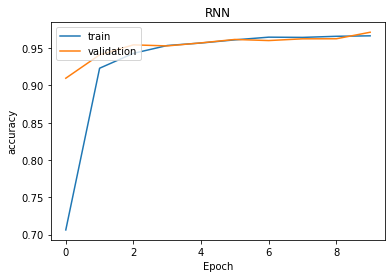

In [65]:
show_train_history(train_history3, 'RNN', 'accuracy', 'val_accuracy')

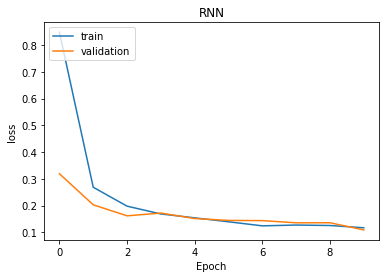

In [66]:
show_train_history(train_history3, 'RNN', 'loss', 'val_loss')

In [68]:
scores3 = model3.evaluate(x_test_RNN_norm, y_test_RNN)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores3[1]*100.0))

313/313 [==============================] - 1s 3ms/step - loss: 0.1037 - accuracy: 0.9705

	[Info] Accuracy of testing data = 97.0%


	[Info] Making prediction to x_test_RNN_norm


D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



	[Info] Show 10 prediction result (From 240):
[5 9 8 7 2 3 0 2 4 2]



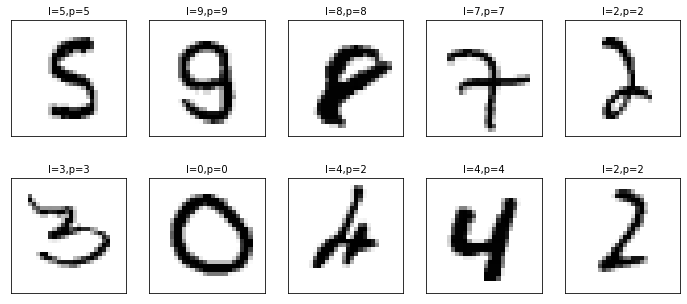

In [71]:
print("\t[Info] Making prediction to x_test_RNN_norm")  
prediction3 = model3.predict_classes(x_test_RNN_norm)  # Making prediction and save result to prediction  
print()  
print("\t[Info] Show 10 prediction result (From 240):")  
print("%s\n" % (prediction[240:250]))  
  
plot_images_labels_predict(X_test_image, y_test_label, prediction, idx=240)

In [72]:
pd.crosstab(y_test_label, prediction3, rownames=['實際值'], colnames=['預測值'])

預測值,0,1,2,3,4,5,6,7,8,9
實際值,,,,,,,,,,
0,963,0,0,0,0,3,9,1,4,0
1,0,1115,2,1,0,0,1,2,13,1
2,1,0,1004,1,0,1,4,9,11,1
3,0,1,8,979,0,7,0,9,4,2
4,0,0,1,0,947,1,12,1,2,18
5,3,1,0,19,2,852,6,1,6,2
6,2,4,0,0,2,3,943,0,4,0
7,4,3,8,1,2,0,1,1001,6,2
8,2,0,8,3,1,7,7,1,939,6


## CNN

In [ ]:
K.clear_session()

In [ ]:
learning_rate = 0.001
batch_size = 128
display_step = 10
n_classes = 10

In [73]:
x_train_CNN = X_train_image.reshape(X_train_image.shape[0], 28, 28, 1).astype('float32')
x_test_CNN = X_test_image.reshape(X_test_image.shape[0], 28, 28, 1).astype('float32')

print("\t[Info] xTrain: %s" % (str(x_train_CNN.shape)))
print("\t[Info] xTest: %s" % (str(x_test_CNN.shape)))

x_train_CNN_norm = x_train_CNN/255
x_test_CNN_norm = x_test_CNN/255

	[Info] xTrain: (60000, 28, 28, 1)
	[Info] xTest: (10000, 28, 28, 1)


In [74]:
y_train_CNN = keras.utils.to_categorical(y_train_label)
y_test_CNN = keras.utils.to_categorical(y_test_label)

In [75]:
from keras.models import Sequential  
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
  
model4 = Sequential()  # Build Linear Model  
  
model4.add(Conv2D(filters=36, kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu'))# Add Input/hidden layer
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Conv2D(filters=36, kernel_size=(5,5), padding='same', activation='relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Dropout(0.25))
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(units=10, kernel_initializer='normal', activation='softmax')) # Add Hidden/output layer  
print("\t[Info] Model summary:")  
model4.summary()  
print("")

	[Info] Model summary:
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 36)        936       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 36)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 36)        32436     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 36)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1764)              0         
_________________________________________________________________
dense_5 (Dense)              (N

In [76]:
opt = keras.optimizers.Adam(learning_rate=0.003)
model4.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [89]:
train_history4 = model4.fit(x=x_train_CNN_norm, 
                          y=y_train_CNN, 
                          validation_split=0.2, 
                          epochs=5, 
                          batch_size=200, 
                          validation_data=(x_test_CNN_norm, y_test_CNN),
                          verbose=2)

Epoch 1/5
240/240 - 47s - loss: 0.0319 - accuracy: 0.9902 - val_loss: 0.0298 - val_accuracy: 0.9919
Epoch 2/5
240/240 - 51s - loss: 0.0298 - accuracy: 0.9904 - val_loss: 0.0316 - val_accuracy: 0.9923
Epoch 3/5
240/240 - 51s - loss: 0.0286 - accuracy: 0.9911 - val_loss: 0.0286 - val_accuracy: 0.9933
Epoch 4/5
240/240 - 53s - loss: 0.0262 - accuracy: 0.9921 - val_loss: 0.0356 - val_accuracy: 0.9923
Epoch 5/5
240/240 - 53s - loss: 0.0256 - accuracy: 0.9920 - val_loss: 0.0335 - val_accuracy: 0.9923


In [90]:
print(train_history4.history)

{'loss': [0.031898725777864456, 0.029809260740876198, 0.028582261875271797, 0.026185598224401474, 0.025647079572081566], 'accuracy': [0.9902499914169312, 0.9904166460037231, 0.9911249876022339, 0.992104172706604, 0.992020845413208], 'val_loss': [0.029818324372172356, 0.031574927270412445, 0.028571484610438347, 0.03561684116721153, 0.03354072943329811], 'val_accuracy': [0.9919166564941406, 0.9922500252723694, 0.9932500123977661, 0.9922500252723694, 0.9922500252723694]}


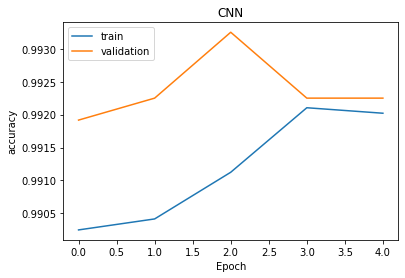

In [91]:
show_train_history(train_history4, 'CNN', 'accuracy', 'val_accuracy')

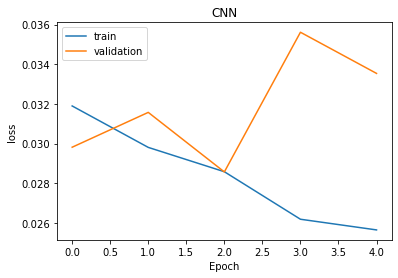

In [92]:
show_train_history(train_history4, 'CNN', 'loss', 'val_loss')

In [93]:
scores4 = model4.evaluate(x_test_CNN_norm, y_test_CNN)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores4[1]*100.0))

313/313 [==============================] - 2s 7ms/step - loss: 0.0261 - accuracy: 0.9919

	[Info] Accuracy of testing data = 99.2%


	[Info] Making prediction to x_test_CNN_norm

	[Info] Show 10 prediction result (From 240):
[5 9 8 7 2 3 0 2 4 2]



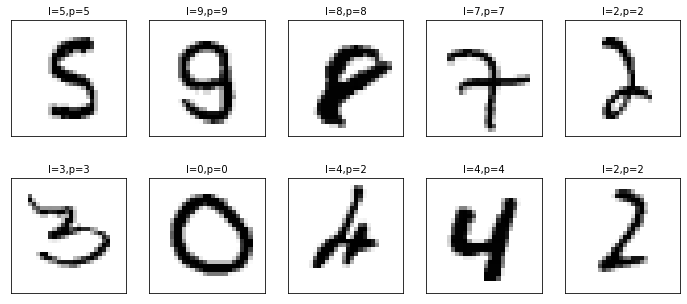

In [94]:
print("\t[Info] Making prediction to x_test_CNN_norm")  
prediction4 = model4.predict_classes(x_test_CNN_norm)  # Making prediction and save result to prediction  
print()  
print("\t[Info] Show 10 prediction result (From 240):")  
print("%s\n" % (prediction[240:250]))  
  
plot_images_labels_predict(X_test_image, y_test_label, prediction, idx=240)

In [83]:
pd.crosstab(y_test_label, prediction4, rownames=['實際值'], colnames=['預測值'])

預測值,0,1,2,3,4,5,6,7,8,9
實際值,,,,,,,,,,
0,977,0,0,0,0,0,2,1,0,0
1,0,1132,1,2,0,0,0,0,0,0
2,1,1,1026,0,1,0,0,3,0,0
3,0,0,0,1003,0,4,0,1,1,1
4,0,1,0,0,975,0,0,1,1,4
5,1,0,0,6,0,883,1,1,0,0
6,1,2,0,0,1,2,951,0,1,0
7,0,3,1,0,0,0,0,1022,1,1
8,1,1,1,1,0,1,0,0,966,3


In [84]:
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores1[1]*100.0))
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores2[1]*100.0))
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores3[1]*100.0))
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores4[1]*100.0))

	[Info] Accuracy of testing data = 97.7%
	[Info] Accuracy of testing data = 98.2%
	[Info] Accuracy of testing data = 97.9%
	[Info] Accuracy of testing data = 97.0%
	[Info] Accuracy of testing data = 99.3%
